<a href="https://colab.research.google.com/github/sumasree10/OIBSIP/blob/main/Project_3_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import io, zipfile, os
for fn in uploaded.keys():
    if fn.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r') as z:
            z.extractall('/content/data')
    elif fn.endswith('.csv'):
        os.makedirs('/content/data', exist_ok=True)
        with open(f'/content/data/{fn}', 'wb') as f:
            f.write(uploaded[fn])
print(os.listdir('/content/data'))


Saving creditcard.csv.zip to creditcard.csv.zip
['creditcard.csv']


In [ ]:
import glob
files_list = glob.glob('/content/data/*.csv')
print(files_list)
data_path = files_list[0]
print('data_path', data_path)


['/content/data/creditcard.csv']
data_path /content/data/creditcard.csv


In [ ]:
import pandas as pd
df = pd.read_csv(data_path)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


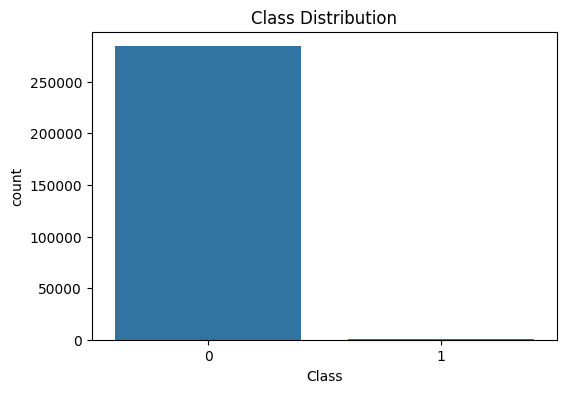

Fraud ratio: 0.001727485630620034


In [ ]:
counts = df['Class'].value_counts()
print(counts)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()
print('Fraud ratio:', counts[1]/counts.sum())


In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']
if 'Time' in X.columns:
    X = X.drop(columns=['Time'])
if 'Amount' in X.columns:
    scaler = StandardScaler()
    X['Amount'] = scaler.fit_transform(X[['Amount']])
else:
    scaler = None
X.shape, y.shape


((284807, 29), (284807,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.value_counts(), y_test.value_counts())


(227845, 29) (56962, 29)
Class
0    227451
1       394
Name: count, dtype: int64 Class
0    56864
1       98
Name: count, dtype: int64


In [ ]:
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
np.bincount(y_train_res)


array([227451, 227451])

In [ ]:
def evaluate_model(model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:,1]
    auc = roc_auc_score(y_te, y_proba)
    ap = average_precision_score(y_te, y_proba)
    cr = classification_report(y_te, y_pred, digits=4)
    cm = confusion_matrix(y_te, y_pred)
    fpr, tpr, _ = roc_curve(y_te, y_proba)
    precision, recall, _ = precision_recall_curve(y_te, y_proba)
    return dict(model=model, auc=auc, ap=ap, report=cr, cm=cm, roc=(fpr,tpr), pr=(precision,recall), proba=y_proba)


In [ ]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
res_lr = evaluate_model(lr, X_train_res, y_train_res, X_test, y_test)
print('LR AUC', res_lr['auc'], 'AP', res_lr['ap'])
print(res_lr['report'])
print(res_lr['cm'])


LR AUC 0.970028112187475 AP 0.7213150704689043
              precision    recall  f1-score   support

           0     0.9999    0.9735    0.9865     56864
           1     0.0563    0.9184    0.1061        98

    accuracy                         0.9734     56962
   macro avg     0.5281    0.9459    0.5463     56962
weighted avg     0.9982    0.9734    0.9850     56962

[[55355  1509]
 [    8    90]]


In [ ]:
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
res_rf = evaluate_model(rf, X_train_res, y_train_res, X_test, y_test)
print('RF AUC', res_rf['auc'], 'AP', res_rf['ap'])
print(res_rf['report'])
print(res_rf['cm'])


RF AUC 0.9782400615001206 AP 0.8339792269151617
              precision    recall  f1-score   support

           0     0.9998    0.9982    0.9990     56864
           1     0.4492    0.8571    0.5895        98

    accuracy                         0.9979     56962
   macro avg     0.7245    0.9277    0.7942     56962
weighted avg     0.9988    0.9979    0.9983     56962

[[56761   103]
 [   14    84]]


In [ ]:
gb = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
res_gb = evaluate_model(gb, X_train_res, y_train_res, X_test, y_test)
print('GB AUC', res_gb['auc'], 'AP', res_gb['ap'])
print(res_gb['report'])
print(res_gb['cm'])


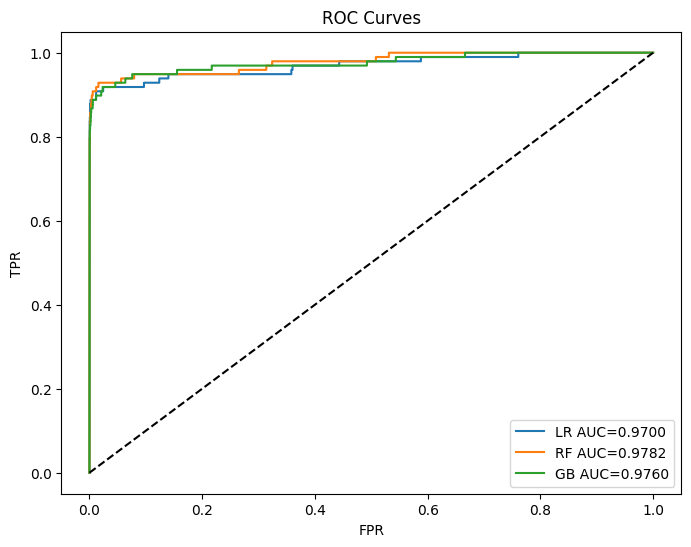

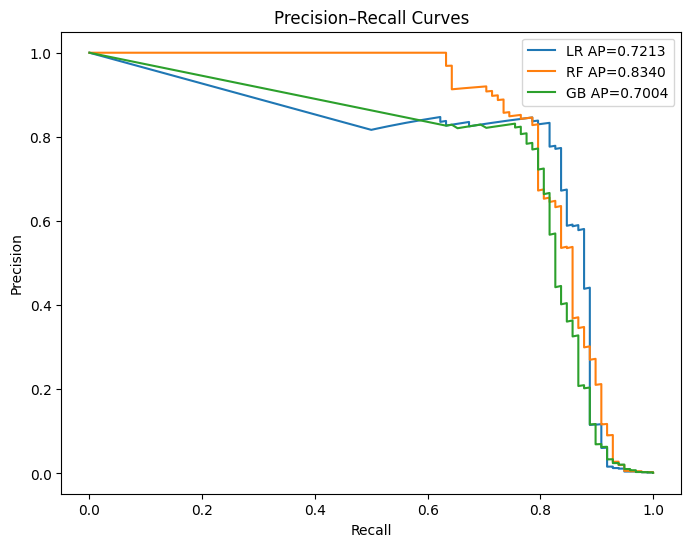

In [ ]:
plt.figure(figsize=(8,6))
for n,r in [('LR',res_lr),('RF',res_rf),('GB',res_gb)]:
    fpr,tpr = r['roc']
    plt.plot(fpr,tpr,label=f'{n} AUC={r["auc"]:.4f}')
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curves')
plt.show()

plt.figure(figsize=(8,6))
for n,r in [('LR',res_lr),('RF',res_rf),('GB',res_gb)]:
    p,rc = r['pr']
    plt.plot(rc,p,label=f'{n} AP={r["ap"]:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision–Recall Curves')
plt.show()


In [ ]:
results = {'lr':res_lr,'rf':res_rf,'gb':res_gb}
best_name = max(results.keys(), key=lambda k:(results[k]['ap'],results[k]['auc']))
best = results[best_name]
from sklearn.metrics import f1_score
p,r,t = precision_recall_curve(y_test,best['proba'])
f1 = 2*p*r/(p+r+1e-12)
idx = np.argmax(f1)
thresh = t[idx] if idx < len(t) else 0.5
y_pred_t = (best['proba']>=thresh).astype(int)
print(best_name, thresh)
print(classification_report(y_test,y_pred_t))
print(confusion_matrix(y_test,y_pred_t))


rf 0.878977528256296
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.79      0.81        98

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56850    14]
 [   21    77]]


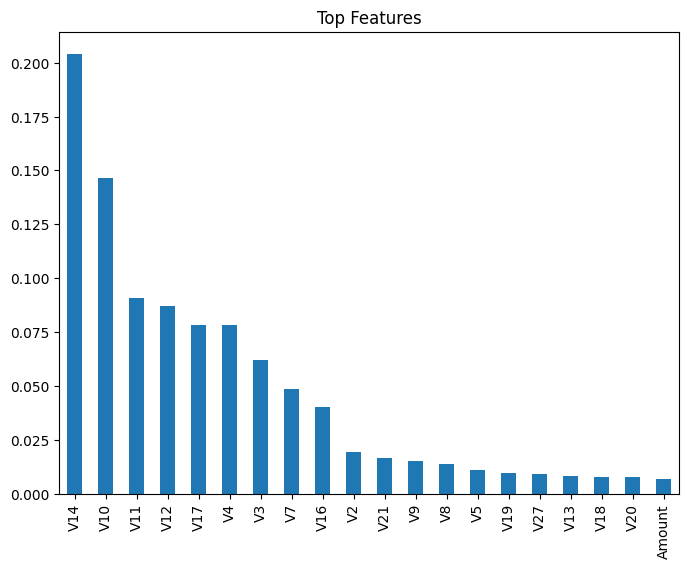

In [ ]:
import pandas as pd
if hasattr(best['model'],'feature_importances_'):
    s = pd.Series(best['model'].feature_importances_, index=X.columns).sort_values(ascending=False)
    s.head(20).plot(kind='bar', figsize=(8,6))
    plt.title('Top Features')
    plt.show()
elif hasattr(best['model'],'coef_'):
    s = pd.Series(abs(best['model'].coef_[0]), index=X.columns).sort_values(ascending=False)
    s.head(20).plot(kind='bar', figsize=(8,6))
    plt.title('Top Coefficients')
    plt.show()


In [ ]:
import joblib, os
os.makedirs('/content/models', exist_ok=True)
joblib.dump(best['model'],'/content/models/best_model.joblib')
if scaler:
    joblib.dump(scaler,'/content/models/amount_scaler.joblib')
out = X_test.copy()
out['y_true'] = y_test.values
out['y_proba'] = best['proba']
out['y_pred'] = y_pred_t
out.to_csv('/content/models/test_results.csv', index=False)
print('Saved in /content/models')


Saved in /content/models
